###**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import imageio
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, balanced_accuracy_score,classification_report,plot_confusion_matrix, confusion_matrix

###Reading data

In [ ]:
data = pd.read_csv ('MCSDatasetNEXTCONLab (2).csv')
data.drop("ID", axis=1, inplace=True)
data.head(20)

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


###**Scaling and split the Data**

In [ ]:
scalar=StandardScaler()
X = scalar.fit_transform(data.drop('Ligitimacy', 1))
y = data['Ligitimacy'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state= 0)

###**Creating MLModels**

In [ ]:
rf = RandomForestClassifier(max_depth=10,random_state=0)
ad=AdaBoostClassifier(random_state = 0)
models=[rf,ad]
names=["RF","AdaBoost"]

###**Functions**

In [ ]:
def MLModels(clf,xtr,ytr,xte,yte,name):
  Scorest=[]
  Scoresr=[]
  clf.fit(xtr,ytr)
  Scoretr=clf.score(xtr,ytr)
  Scoret=clf.score(xte,yte)
  pred=clf.predict(xte)
  predd=clf.predict(xtr)
  trn= ['Legitimate', 'Fake Legitimate']
  print("Train Accuracy\n",classification_report(ytr,predd,target_names=trn))
  print("Test Accuracy\n",classification_report(yte,pred ,target_names=trn))
  if name=="RF":
    print('RF Train Accuracy={:.2f}\n , RF Test Accuracy={:.2f} \n'
         .format(Scoretr,Scoret))
  elif name=="AdaBoost":
    print('AdaBoost Train Accuracy={:.2f}\n , AdaBoost Test Accuracy={:.2f} \n'
         .format(Scoretr,Scoret))
  Scorest.append(Scoret)  
  Scoresr.append(Scoretr)
  return Scorest,Scoresr, predd , pred
def Barplot(acc):
  fig = plt.figure(figsize = (10, 5))
  labels = ["RF","Adaboost"]
  Accuracy = acc
  plt.bar(labels,Accuracy,width = 0.3)
  plt.title('Accuracy comparison results ')
  plt.xlabel('Models ')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Accuracy')
  plt.show()

###MLModels

In [ ]:
testacc=[]
trainacc = []
for i,n in zip(models, names):
  acctr,accte,predd,pred= MLModels(i,X_train,y_train,X_test,y_test,n)
  testacc.append(accte)
  trainacc.append(acctr)

Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.99      0.84      0.91      1507
Fake Legitimate       0.98      1.00      0.99     10080

       accuracy                           0.98     11587
      macro avg       0.99      0.92      0.95     11587
   weighted avg       0.98      0.98      0.98     11587

Test Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.97      0.79      0.87       390
Fake Legitimate       0.97      1.00      0.98      2507

       accuracy                           0.97      2897
      macro avg       0.97      0.90      0.93      2897
   weighted avg       0.97      0.97      0.97      2897

RF Train Accuracy=0.98
 , RF Test Accuracy=0.97 

Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.88      0.76      0.82      1507
Fake Legitimate       0.97      0.99      0.97     10080

       accuracy                         

###Comparing Results For Training and Test Accuracies before CGAN

Train **Accuracy**

In [ ]:
flat_list = [x for xs in trainacc for x in xs]
flat_list2 = [x for xs in testacc for x in xs]

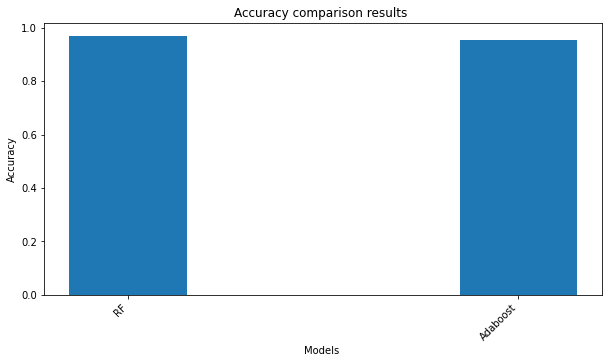

In [ ]:
Barplot(flat_list)

Test Accuracy

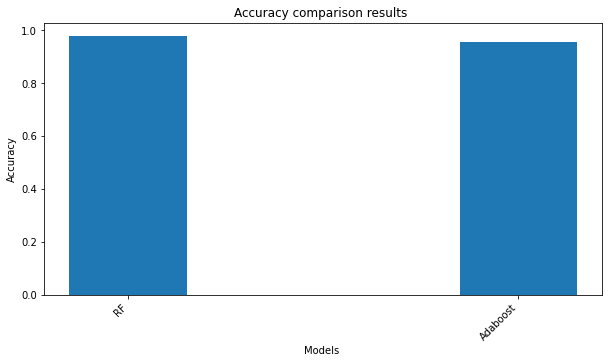

In [ ]:
Barplot(flat_list2)

###**Define CGAN**

Constant Parameters

In [ ]:
batch_size = 64
num_channels = len(list(data.columns[data.columns != 'Ligitimacy' ]))
num_classes = 2
latent_dim = 128

In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
  # Create the discriminator.
discriminator = keras.Sequential(
      [
          keras.layers.InputLayer(input_shape = discriminator_in_channels ),
          layers.Dense(latent_dim*3),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
       
          layers.Dense(latent_dim*2),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
       
          layers.Dense(latent_dim),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
       
          layers.Dense(1, activation="tanh")

      ],
      name="discriminator",
  )
# Create the generator.
generator = keras.Sequential(
    [
          keras.layers.InputLayer(input_shape = generator_in_channels ),
          layers.Dense(latent_dim),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
       
          layers.Dense(latent_dim*2),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
       
          layers.Dense(latent_dim*3),
          layers.Dropout(0.2),          
          layers.LeakyReLU(alpha=0.2),
          layers.BatchNormalization(momentum=0.8),
     
        layers.Dense(num_channels, activation="tanh")
    
    ],
    name="generator",
)


In [ ]:
class ConditionalGAN(keras.Model):


    def __init__(self, discriminator, generator, latent_dim):

        super(ConditionalGAN, self).__init__()

        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")
        #  # we don't train discriminator when training generator

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
    def train_step(self, data):
        # Unpack the data.
        real_Tasks, one_hot_labels = data
        print(data)
        # Add dummy dimensions to the labels so that they can be concatenated with
        # the Tasks. This is for the discriminator.

        Task_one_hot_labels = one_hot_labels[:, :, None, None]
        Task_one_hot_labels = tf.reshape(
            Task_one_hot_labels, (-1,  num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_Tasks)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake Tasks.
        generated_Tasks = self.generator(random_vector_labels)

        # Combine them with real Tasks. Note that we are concatenating the labels
        # with these Tasks here.
        fake_Task_and_labels = tf.concat([generated_Tasks, Task_one_hot_labels], -1)

        real_Task_and_labels = tf.concat([real_Tasks, Task_one_hot_labels], -1)

        combined_Tasks = tf.concat(
            [fake_Task_and_labels, real_Task_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake Tasks.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:

            predictions = self.discriminator(combined_Tasks)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real Tasks".
        misleading_labels = tf.zeros((batch_size, 1))
        
        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_Tasks = self.generator(random_vector_labels)
            fake_Task_and_labels = tf.concat([fake_Tasks, Task_one_hot_labels], -1)

            predictions = self.discriminator(fake_Task_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

Preparing Data for training the CGAN

In [ ]:
X_Train_GANS = X_train.astype("float32")
y_Train_GANS = keras.utils.to_categorical(y_train, 2)
GAN_DataSet = tf.data.Dataset.from_tensor_slices((X_Train_GANS, y_Train_GANS))
GAN_DataSet = GAN_DataSet.shuffle(buffer_size=2048).batch(batch_size)

Train CGAN

In [ ]:
GAN = ConditionalGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
GAN.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

GAN.fit(GAN_DataSet, epochs=32)

Epoch 1/32
(<tf.Tensor 'IteratorGetNext:0' shape=(None, 11) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 2) dtype=float32>)
(<tf.Tensor 'IteratorGetNext:0' shape=(None, 11) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 2) dtype=float32>)
182/182 [==============================] - 5s 13ms/step - g_loss: 0.9477 - d_loss: 0.5217
Epoch 2/32
182/182 [==============================] - 2s 13ms/step - g_loss: 1.2672 - d_loss: 0.3830
Epoch 3/32
182/182 [==============================] - 2s 13ms/step - g_loss: 1.3111 - d_loss: 0.3150
Epoch 4/32
182/182 [==============================] - 2s 13ms/step - g_loss: 1.3127 - d_loss: 0.3148
Epoch 5/32
182/182 [==============================] - 3s 18ms/step - g_loss: 1.3127 - d_loss: 0.3136
Epoch 6/32
182/182 [==============================] - 2s 13ms/step - g_loss: 1.3130 - d_loss: 0.3134
Epoch 7/32
182/182 [==============================] - 2s 13ms/step - g_loss: 1.3131 - d_loss: 0.3133
Epoch 8/32
182/182 [=================

###Genrate 

In [ ]:
trained_gen = GAN.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 8000 # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(number):
    # Convert the start and end labels to one-hot encoded vectors.
    label = keras.utils.to_categorical([number], num_classes)
    label = tf.cast(label, tf.float32)

    # Calculate the interpolation vector between the two labels.
    percent_label = tf.linspace(0, 1, num_interpolation)[:, None]
    percent_label = tf.cast(percent_label, tf.float32)
    interpolation_labels = (
        label * (1 - percent_label) + label * percent_label
    )

    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = tf.concat([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 0  # @param {type:"slider", min:0, max:9, step:1}
end_class = 1  # @param {type:"slider", min:0, max:9, step:1}

vertical_stack = interpolate_class(start_class)

###Mixing Genrated data with test data

In [ ]:
new_X_test = np.concatenate((vertical_stack,X_test), axis=0)

In [ ]:
zeros = np.zeros(num_interpolation, int)
new_y_test = pd.concat([pd.DataFrame(y_test), pd.DataFrame(zeros)], axis=0)

Train Using Generated data with test data

In [ ]:
testaccGAN=[]
trainaccGAN = []
for i,n in zip(models, names):
  accte,acctr,predd,pred= MLModels(i,X_train,y_train,new_X_test,new_y_test,n)
  testaccGAN.append(accte)
  trainaccGAN.append(acctr)

Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.99      0.84      0.91      1507
Fake Legitimate       0.98      1.00      0.99     10080

       accuracy                           0.98     11587
      macro avg       0.99      0.92      0.95     11587
   weighted avg       0.98      0.98      0.98     11587

Test Accuracy
                  precision    recall  f1-score   support

     Legitimate       1.00      0.04      0.07      8390
Fake Legitimate       0.24      1.00      0.38      2507

       accuracy                           0.26     10897
      macro avg       0.62      0.52      0.23     10897
   weighted avg       0.82      0.26      0.14     10897

RF Train Accuracy=0.98
 , RF Test Accuracy=0.26 

Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.88      0.76      0.82      1507
Fake Legitimate       0.97      0.99      0.97     10080

       accuracy                         

In [ ]:
flat_list_GAN = [x for xs in trainaccGAN for x in xs]
flat_list_GAN_2 = [x for xs in testaccGAN for x in xs]

###After Applying the generated Data

Train Accuracy

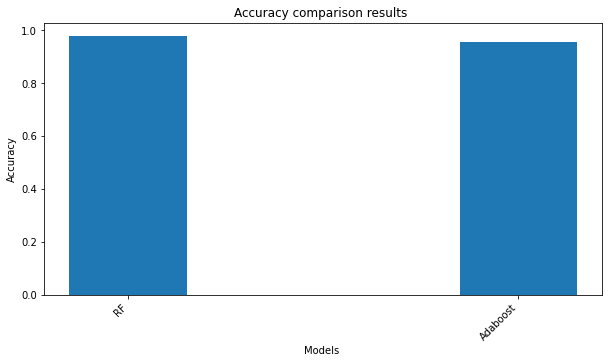

In [ ]:
Barplot(flat_list_GAN)

Test Accuracy

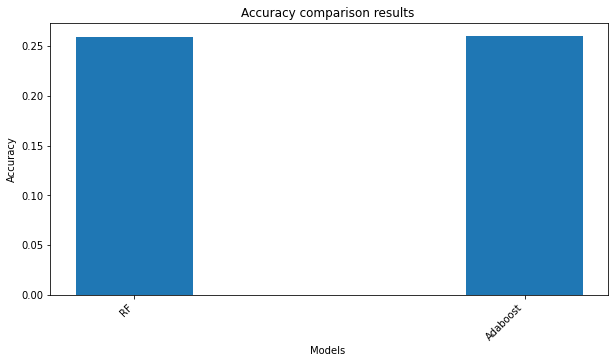

In [ ]:
Barplot(flat_list_GAN_2)

###Genrate Noise

In [ ]:
discriminator = keras.Sequential(
      [
          keras.layers.InputLayer(input_shape =11),
          layers.Dense(64),
          layers.LeakyReLU(alpha=0.2),
          layers.Dense(32),
          layers.LeakyReLU(alpha=0.2),
          layers.Dense(1, activation="tanh")
      ],
      name="discriminator",
 )

In [ ]:
GAN.discriminator = discriminator

In [ ]:
noisey = GAN.discriminator.predict(new_X_test)

###Mapping Values to 0,1

In [ ]:
np.round(noisey)

array([[-0.],
       [-0.],
       [-0.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [ ]:
avg=sum(noisey)/len(noisey)

In [ ]:
for c ,i in enumerate(noisey):
  if  i<avg or i>np.min(noisey):
    noisey[c] = 1
  else :
    noisey[c] = 0

###Train using mixed data from discriminator and test data

In [ ]:
testaccdes=[]
trainaccdes = []
for i,n in zip(models, names):
  accte,acctr,predd,pred= MLModels(i,X_train,y_train,new_X_test,noisey,n)
  testaccdes.append(accte)
  trainaccdes.append(acctr)

Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.99      0.84      0.91      1507
Fake Legitimate       0.98      1.00      0.99     10080

       accuracy                           0.98     11587
      macro avg       0.99      0.92      0.95     11587
   weighted avg       0.98      0.98      0.98     11587

Test Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.00      0.00      0.00         0
Fake Legitimate       1.00      0.97      0.99     10897

       accuracy                           0.97     10897
      macro avg       0.50      0.49      0.49     10897
   weighted avg       1.00      0.97      0.99     10897

RF Train Accuracy=0.98
 , RF Test Accuracy=0.97 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.88      0.76      0.82      1507
Fake Legitimate       0.97      0.99      0.97     10080

       accuracy                           0.96     11587
      macro avg       0.92      0.87      0.90     11587
   weighted avg       0.95      0.96      0.95     11587

Test Accuracy
                  precision    recall  f1-score   support

     Legitimate       0.00      0.00      0.00         0
Fake Legitimate       1.00      0.97      0.98     10897

       accuracy                           0.97     10897
      macro avg       0.50      0.48      0.49     10897
   weighted avg       1.00      0.97      0.98     10897

AdaBoost Train Accuracy=0.96
 , AdaBoost Test Accuracy=0.97 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
flat_list_des = [x for xs in trainaccdes for x in xs]
flat_list_des_2 = [x for xs in testaccdes for x in xs]

###Applying Noise from Discrimnator

train accuracy

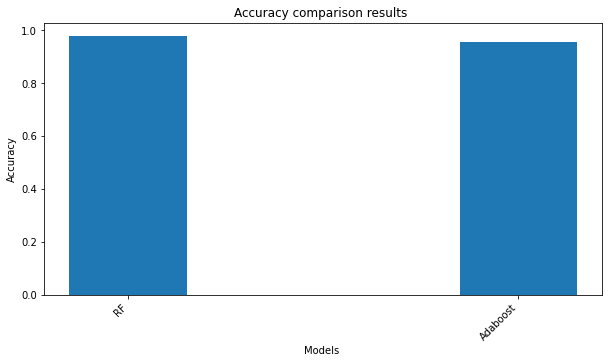

In [ ]:
Barplot(flat_list_des)

Applying noise from discriminator test accuracy

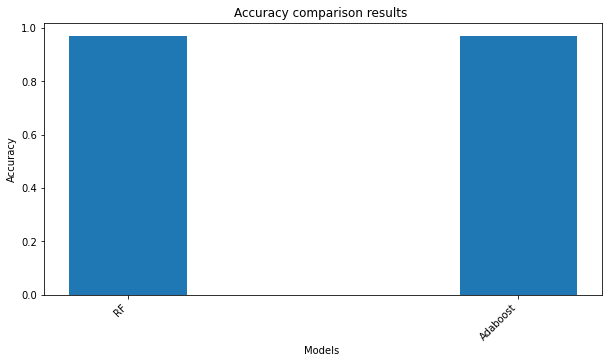

In [ ]:
Barplot(flat_list_des_2)